In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv

In [4]:
bmp_dir = '../DMD_inputs/'
target_img = '678_Block.bmp'

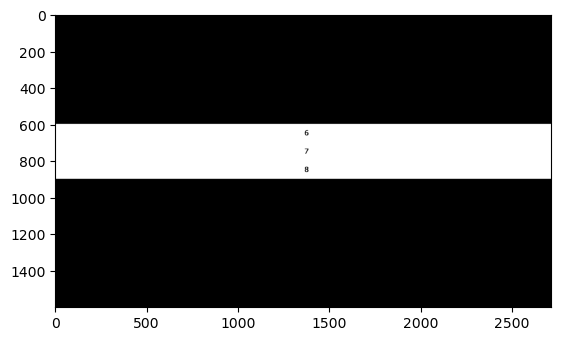

In [5]:
img = cv.imread(bmp_dir + target_img, cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

In [6]:
for angle in range(0, 360, 30):
    M = cv.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), angle, 1)
    rotated_img = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))
    # white to black
    if angle == 0: print(np.max(rotated_img))
    rotated_img = 255 - rotated_img
    # save the rotated image
    cv.imwrite(bmp_dir + 'rotated_' + str(angle) + '_' + target_img, rotated_img)

255


True

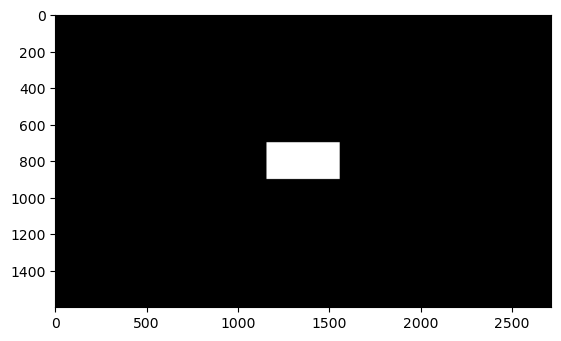

In [7]:
# crate a rectange in the center of the image
w, h = 400, 200
# empty image first 
rect = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
center_x = rect.shape[1] // 2
center_y = rect.shape[0] // 2
rect = cv.rectangle(rect, (center_x - w//2, center_y - h//2), (center_x + w//2, center_y + h//2), 255, -1)
plt.imshow(rect, cmap='gray')
cv.imwrite(bmp_dir + 'rect.bmp', rect)
# opposite version
rect = 255 - rect
cv.imwrite(bmp_dir + 'rect_opposite.bmp', rect)

In [8]:
# pure black and white image
black = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
white = 255 - black
cv.imwrite(bmp_dir + 'black.bmp', black)
cv.imwrite(bmp_dir + 'white.bmp', white)

True

In [9]:
single_pixel_wide = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
# one pixel wide line in the center
single_pixel_wide[img.shape[0]//2, :] = 255

cv.imwrite(bmp_dir + 'line_1px.bmp', single_pixel_wide)

True

In [10]:
# two pixel wide line in the center
two_pixel_wide = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
two_pixel_wide[img.shape[0]//2, :] = 255
two_pixel_wide[img.shape[0]//2 + 1, :] = 255

cv.imwrite(bmp_dir + 'line_2px.bmp', two_pixel_wide)

True

In [11]:
# four pixel wide line in the center
four_pixel_wide = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
four_pixel_wide[img.shape[0] // 2 - 1: img.shape[0] // 2 + 3, :] = 255

cv.imwrite(bmp_dir + 'line_4px.bmp', four_pixel_wide)

True

In [12]:
# eight pixel wide line in the center
eight_pixel_wide = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
eight_pixel_wide[img.shape[0] // 2 - 3: img.shape[0] // 2 + 5, :] = 255

cv.imwrite(bmp_dir + 'line_8px.bmp', eight_pixel_wide)

True

In [13]:
# sixteen pixel wide line in the center
sixteen_pixel_wide = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
sixteen_pixel_wide[img.shape[0] // 2 - 7: img.shape[0] // 2 + 9, :] = 255

cv.imwrite(bmp_dir + 'line_16px.bmp', sixteen_pixel_wide)

True

In [14]:
# thirty two wide line in the center
thirty_two_pixel_wide = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
thirty_two_pixel_wide[img.shape[0] // 2 - 15: img.shape[0] // 2 + 17, :] = 255

cv.imwrite(bmp_dir + 'line_32px.bmp', thirty_two_pixel_wide)

True

In [15]:
# half black half white
half_half = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
half_half[: img.shape[0]//2, :] = 255

cv.imwrite(bmp_dir + 'half_half.bmp', half_half)

True

In [27]:
for i in range(6):
    # draw a circle
    circle = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    cv.circle(circle, (img.shape[1]//2, img.shape[0]//2), (i + 1) * 100, 255, -1)
    cv.imwrite(bmp_dir + 'circle_' + str(i) + '.bmp', circle)

In [21]:
def draw_ring(inner: int, outer: int, img_shape: tuple = (1600, 2716)) -> np.ndarray:
    ring = np.zeros((img_shape[0], img_shape[1]), dtype=np.uint8)
    # white large circle
    ring = cv.circle(ring, (ring.shape[1]//2, ring.shape[0]//2), outer, 255, -1)
    # black small circle
    ring = cv.circle(ring, (ring.shape[1]//2, ring.shape[0]//2), inner, 0, -1)
    return ring

In [25]:
for i in range(100, 300, 50):
    ring = draw_ring(i, 300)
    cv.imwrite(bmp_dir + 'ring_' + str(i) + '_300.bmp', ring)

In [26]:
for i in range(350, 550, 50):
    ring = draw_ring(200, i)
    cv.imwrite(bmp_dir + 'ring_250_' + str(i)+ '.bmp', ring)